**Objective: Implement search algorithms and apply them to solve problems.**

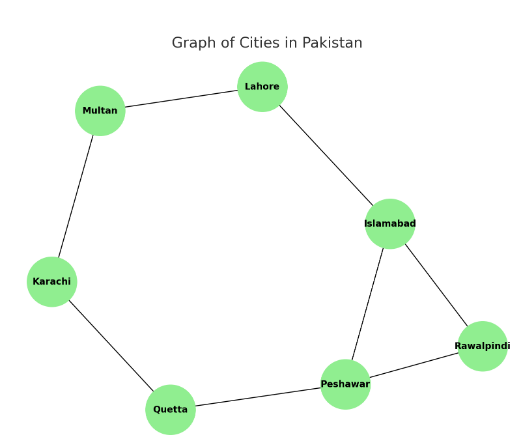

DFS Steps:

**Start at the first city:**

We begin from a specified city, such as Islamabad. We mark it as part of the current path.
**Explore one path as deep as possible:**

From Islamabad, we choose a neighboring city, like Rawalpindi, and continue exploring further from there.
If Rawalpindi has neighbors, we move to the next unvisited neighbor, such as Peshawar.
We keep moving to the next neighbor until we reach the destination city (Karachi), or there are no more neighbors to explore.

**Backtrack if necessary:**

If we reach a city (like Peshawar) that doesn’t lead to the destination or all its neighbors have been explored, we go back (backtrack) to the previous city.
We then try the next unvisited neighbor of the previous city.

**Continue until the destination is found:**

This process of moving forward (exploring) and backward (backtracking) continues until we find a path to the destination (Karachi).

**Store the path:**

Once we reach Karachi, we save this path. DFS doesn’t stop at finding one path—it keeps exploring to find all possible paths.

**Explore all paths:**

DFS will continue searching for alternative paths until all possibilities from the starting city (Islamabad) to the destination (Karachi) have been explored.

All Paths from Islamabad to Karachi:
Islamabad -> Rawalpindi -> Peshawar -> Quetta -> Karachi
Islamabad -> Peshawar -> Quetta -> Karachi
Islamabad -> Lahore -> Multan -> Karachi


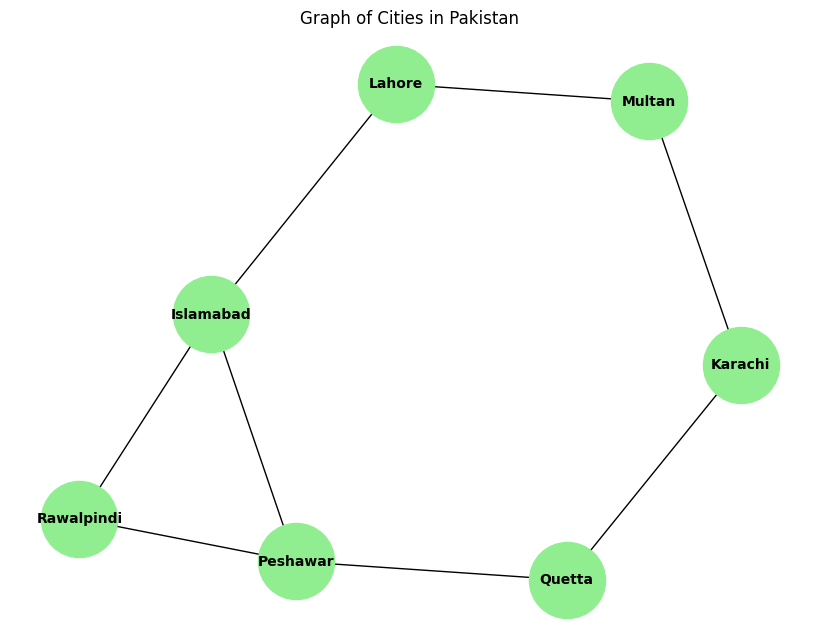

In [ ]:
# Importing necessary libraries for plotting and graph handling
import matplotlib.pyplot as plt
import networkx as nx

# Function to perform Depth-First Search (DFS) on a graph
def dfs(graph, start, goal, path=None):
    # Initialize path if it's not provided
    if path is None:
        path = []
    # Add the starting node to the current path
    path = path + [start]

    # Check if the current node is the goal
    if start == goal:
        return [path]  # Return the current path if the goal is reached

    # If the start node is not in the graph, return an empty list
    if start not in graph:
        return []

    # List to store all paths found
    paths = []

    # Explore each neighbor of the current node
    for neighbor in graph[start]:
        # Only explore neighbors that haven't been visited in the current path
        if neighbor not in path:
            # Recursively call DFS for the neighbor
            new_paths = dfs(graph, neighbor, goal, path)
            # Add all newly found paths to the main paths list
            for p in new_paths:
                paths.append(p)

    return paths  # Return all valid paths found from start to goal

# Defining a graph representing cities and their connections in Pakistan
pakistan_cities_graph = {
    'Islamabad': ['Rawalpindi', 'Peshawar', 'Lahore'],
    'Rawalpindi': ['Islamabad', 'Peshawar'],
    'Peshawar': ['Islamabad', 'Rawalpindi', 'Quetta'],
    'Lahore': ['Islamabad', 'Multan'],
    'Multan': ['Lahore', 'Karachi'],
    'Karachi': ['Multan', 'Quetta'],
    'Quetta': ['Peshawar', 'Karachi']
}

# Finding all paths from 'Islamabad' to 'Karachi'
paths = dfs(pakistan_cities_graph, 'Islamabad', 'Karachi')
print("All Paths from Islamabad to Karachi:")
# Print each found path in a readable format
for path in paths:
    print(" -> ".join(path))

# Function to plot the graph using NetworkX and Matplotlib
def plot_graph(graph):
    # Create a new graph object
    G = nx.Graph()
    # Add edges to the graph from the adjacency list
    for city, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(city, neighbor)

    # Set up the plot size
    plt.figure(figsize=(8, 6))
    # Generate positions for the nodes using the spring layout
    pos = nx.spring_layout(G)
    # Draw the graph with specified visual properties
    nx.draw(G, pos, with_labels=True, node_color='lightgreen',
            node_size=3000, font_size=10, font_weight='bold',
            edge_color='black')
    # Set the title for the plot
    plt.title("Graph of Cities in Pakistan")
    # Display the plot
    plt.show()

# Call the plot function to visualize the graph of cities
plot_graph(pakistan_cities_graph)

